In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_25040\4056416768.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


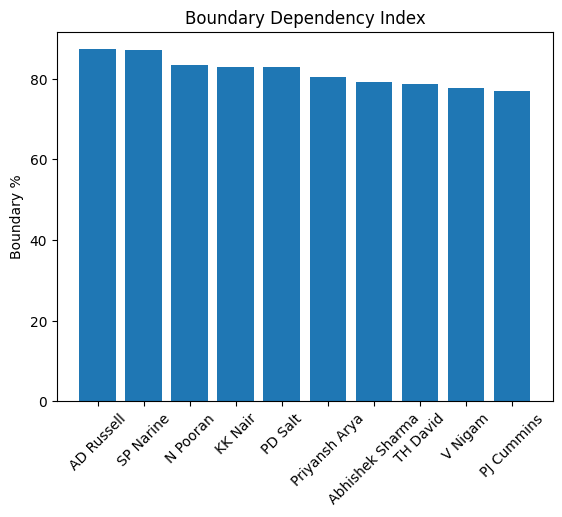

In [2]:
query = """
SELECT
    p.player_name,
    SUM(bd.runs_batter) AS total_runs,
    SUM(CASE WHEN bd.is_four = 1 THEN 4 ELSE 0 END +
        CASE WHEN bd.is_six = 1 THEN 6 ELSE 0 END) AS boundary_runs
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING total_runs >= 50
"""
df = pd.read_sql(query, conn)

df["boundary_pct"] = (df["boundary_runs"] / df["total_runs"]) * 100

df = df.sort_values("boundary_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["player_name"], df["boundary_pct"])
plt.xticks(rotation=45)
plt.ylabel("Boundary %")
plt.title("Boundary Dependency Index")
plt.show()


In [3]:
query = """
SELECT
    p.player_name AS batter,
    COUNT(DISTINCT bd.match_id) AS matches_played,
    COUNT(*) AS balls_faced,
    SUM(CASE WHEN bd.is_six = 1 THEN 1 ELSE 0 END) AS sixes
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING sixes > 0
ORDER BY sixes DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)

df["balls_per_six"] = df["balls_faced"] / df["sixes"]
df


C:\Users\hp\AppData\Local\Temp\ipykernel_25040\2414851816.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,matches_played,balls_faced,sixes,balls_per_six
0,N Pooran,9,195,31.0,6.290323
1,YBK Jaiswal,9,248,20.0,12.400000
2,SS Iyer,8,150,20.0,7.500000
3,SA Yadav,9,231,19.0,12.157895
4,MR Marsh,8,226,18.0,12.555556
5,Priyansh Arya,8,131,18.0,7.277778
6,R Parag,9,160,16.0,10.000000
7,KL Rahul,7,218,16.0,13.625000
8,RG Sharma,8,156,15.0,10.400000
9,AK Markram,9,221,15.0,14.733333


In [4]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS fours
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_25040\1300005030.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,fours
0,B Sai Sudharsan,42
1,JC Buttler,40
2,SA Yadav,38
3,V Kohli,35
4,TM Head,33
5,MR Marsh,33
6,Shubman Gill,33
7,N Pooran,32
8,YBK Jaiswal,32
9,Abhishek Sharma,31
